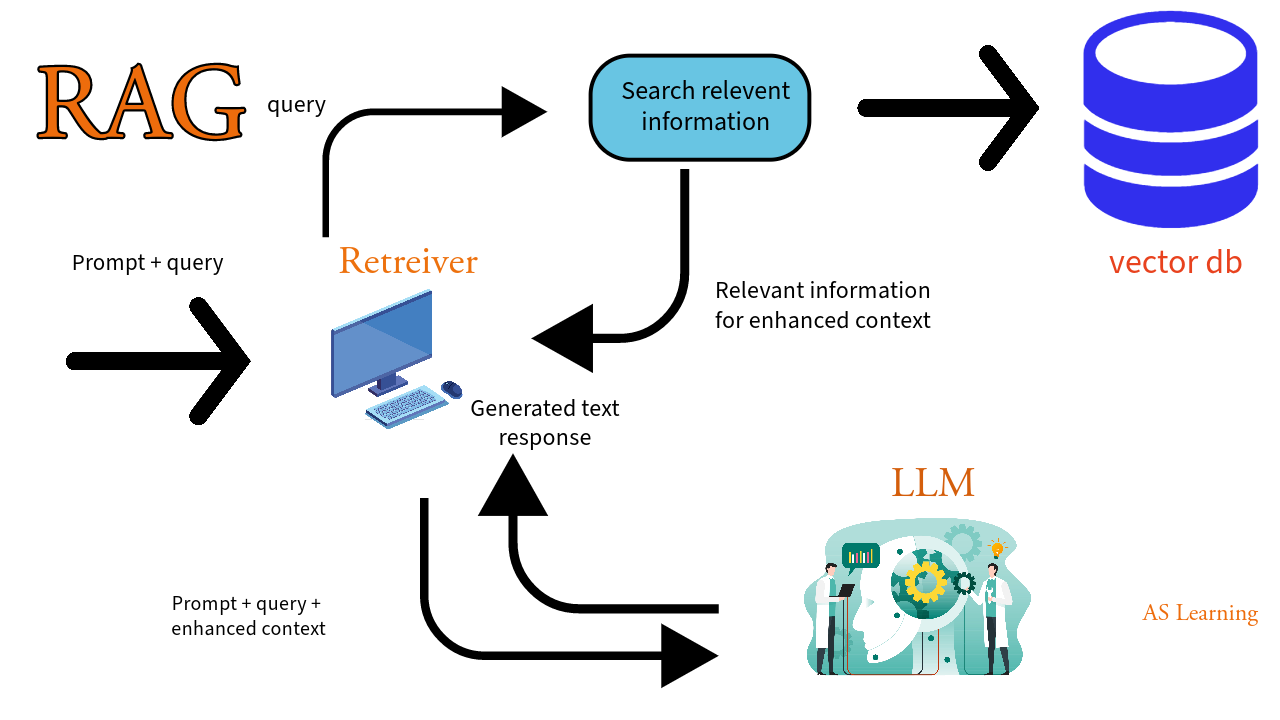

In [ ]:
! pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass('Enter your OpenAI API Key: ')


Enter your OpenAI API Key: ··········


In [ ]:
import os
import openai
import random

# Initialize OpenAI API
openai.api_key = os.getenv("OPENAI_API_KEY")  # Alternative: Use environment variable
if openai.api_key is None:
    raise Exception("No OpenAI API key found. Please set it as an environment variable or in main.py")

In [ ]:
# Function to generate queries using OpenAI's ChatGPT
def generate_queries_chatgpt(original_query):

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that generates multiple search queries based on a single input query."},
            {"role": "user", "content": f"Generate multiple search queries related to: {original_query}"},
            {"role": "user", "content": "OUTPUT (4 queries):"}
        ]
    )

    generated_queries = response.choices[0]["message"]["content"].strip().split("\n")
    return generated_queries

In [ ]:
# Mock function to simulate vector search, returning random scores
def vector_search(query, all_documents):
    available_docs = list(all_documents.keys())
    random.shuffle(available_docs)
    selected_docs = available_docs[:random.randint(2, 5)]
    scores = {doc: round(random.uniform(0.7, 0.9), 2) for doc in selected_docs}
    return {doc: score for doc, score in sorted(scores.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
# Reciprocal Rank Fusion algorithm
def reciprocal_rank_fusion(search_results_dict, k=60):
    fused_scores = {}
    print("Initial individual search result ranks:")
    for query, doc_scores in search_results_dict.items():
        print(f"For query '{query}': {doc_scores}")

    for query, doc_scores in search_results_dict.items():
        print(query,doc_scores)
        for rank, (doc, score) in enumerate(sorted(doc_scores.items(), key=lambda x: x[1], reverse=True)):
            print(rank,doc,score)
            if doc not in fused_scores:
                fused_scores[doc] = 0
            previous_score = fused_scores[doc]
            #print(fused_scores[doc])
            fused_scores[doc] += 1 / (rank + k)
            print(f"Updating score for {doc} from {previous_score} to {fused_scores[doc]} based on rank {rank} in query '{query}'")

    reranked_results = {doc: score for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True)}
    print("Final reranked results:", reranked_results)
    return reranked_results

In [ ]:
# Dummy function to simulate generative output
def generate_output(reranked_results, queries):
    return f"Final output based on {queries} and reranked documents: {list(reranked_results.keys())}"

In [ ]:
# Predefined set of documents (usually these would be from your search database)
all_documents = {
    "doc1": "Climate change and economic impact.",
    "doc2": "Public health concerns due to climate change.",
    "doc3": "Climate change: A social perspective.",
    "doc4": "Technological solutions to climate change.",
    "doc5": "Policy changes needed to combat climate change.",
    "doc6": "Climate change and its impact on biodiversity.",
    "doc7": "Climate change: The science and models.",
    "doc8": "Global warming: A subset of climate change.",
    "doc9": "How climate change affects daily weather.",
    "doc10": "The history of climate change activism."
}

# Main function
if __name__ == "__main__":
    original_query = "impact of climate change"
    generated_queries = generate_queries_chatgpt(original_query)

    all_results = {}
    for query in generated_queries:
        search_results = vector_search(query, all_documents)
        all_results[query] = search_results

    reranked_results = reciprocal_rank_fusion(all_results)

    final_output = generate_output(reranked_results, generated_queries)

    print(final_output)

Initial individual search result ranks:
For query '1. Causes of climate change and its impact on the environment': {'doc4': 0.88, 'doc10': 0.85, 'doc6': 0.77}
For query '2. Economic impact of climate change on global industries': {'doc5': 0.86, 'doc3': 0.83, 'doc4': 0.79, 'doc8': 0.78, 'doc7': 0.75}
For query '3. Strategies to mitigate the impact of climate change': {'doc3': 0.85, 'doc9': 0.74}
For query '4. Social and health effects of climate change on vulnerable communities': {'doc1': 0.8, 'doc6': 0.79, 'doc8': 0.78}
1. Causes of climate change and its impact on the environment {'doc4': 0.88, 'doc10': 0.85, 'doc6': 0.77}
0 doc4 0.88
Updating score for doc4 from 0 to 0.016666666666666666 based on rank 0 in query '1. Causes of climate change and its impact on the environment'
1 doc10 0.85
Updating score for doc10 from 0 to 0.01639344262295082 based on rank 1 in query '1. Causes of climate change and its impact on the environment'
2 doc6 0.77
Updating score for doc6 from 0 to 0.0161290